
## Student Performance Indicator

Life cycle of Machine learning project

1. Understand the problem statement
2. Data Collection 
3. Data checks to Perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model 

## 1) Problem statement
- This Project understands how the student's performance (test score) is affected by other variable ssuch as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data Collection
- dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?dataId=74977
- The data consists of 8 columns and 1000 rows.

# 2.1 Import Data and required Packages
Importing Pandas, NUmpy, Matplotlib, Seaborn and Warnings library. 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('data/stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

# 2.2 Dataset information
- gender: sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate degree, high shcool)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

In [9]:
## Checkinf Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## There is no missing data 


In [10]:
## Check Duplicates
df.duplicated().sum()

np.int64(0)

## There is no duplicates values in the data set


In [11]:
## Check data types, check null and Dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check Statistics of data set

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insight
- from above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

# 3.7 Exploring Data

In [14]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [15]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

# Print columns
print("we have {} numerical features :{}".format(len(numeric_features), numeric_features))
print("we have {} categorical features :{}".format(len(categorical_features), categorical_features))

we have 3 numerical features :['math_score', 'reading_score', 'writing_score']
we have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# 3.8 Adding columns for "Total Score" and "Average"



In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] ==100] ['average'].count()
writing_full = df[df['writing_score'] ==100] ['average'].count()
math_full = df[df['math_score'] ==100] ['average'].count()

print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')

Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [18]:
reading_less_20 = df[df['reading_score'] <=20] ['average'].count()
math_less_20 = df[df['math_score'] <=20] ['average'].count()
writing_less_20 = df[df['writing_score'] <=20] ['average'].count()


print(f'Number of students with less than 20 marks in maths: {math_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


## Insights
- from above values we get students have performed worst in maths
- best performance is in reading section

# 4. Exploring data (Visualizaion)

# 4.1 Visualize aveage score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

# 4.1.1 Histogram and KDE 

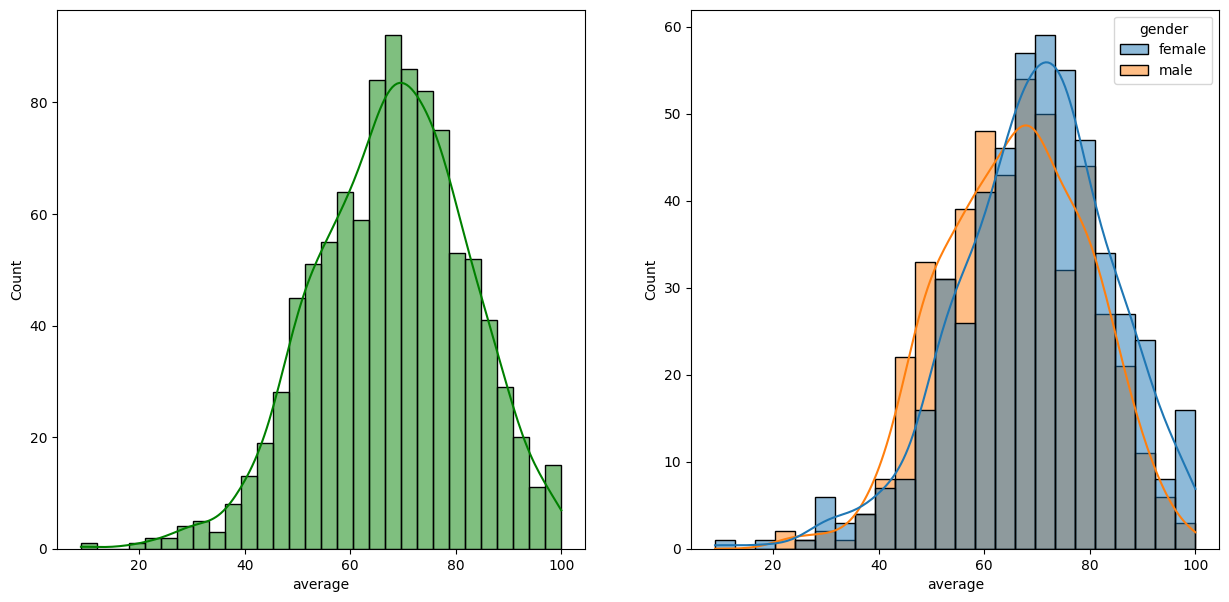

In [40]:
fig, axs = plt.subplots(1,2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

# Insights
- female students tend to perform well than the male students.

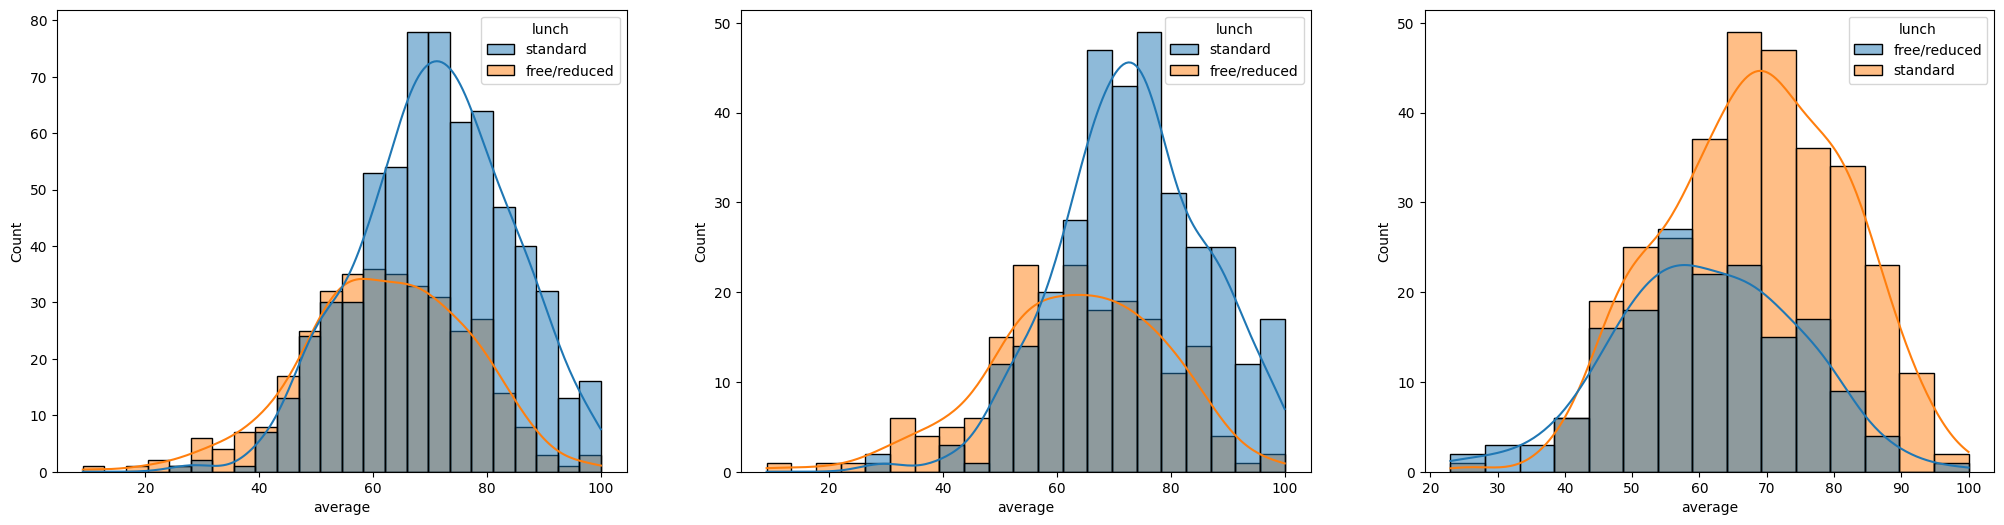

In [62]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()





# Insights
- standard lunch helps perform well in exams.
- standard lunch helps perform well in exams be it a male or a female

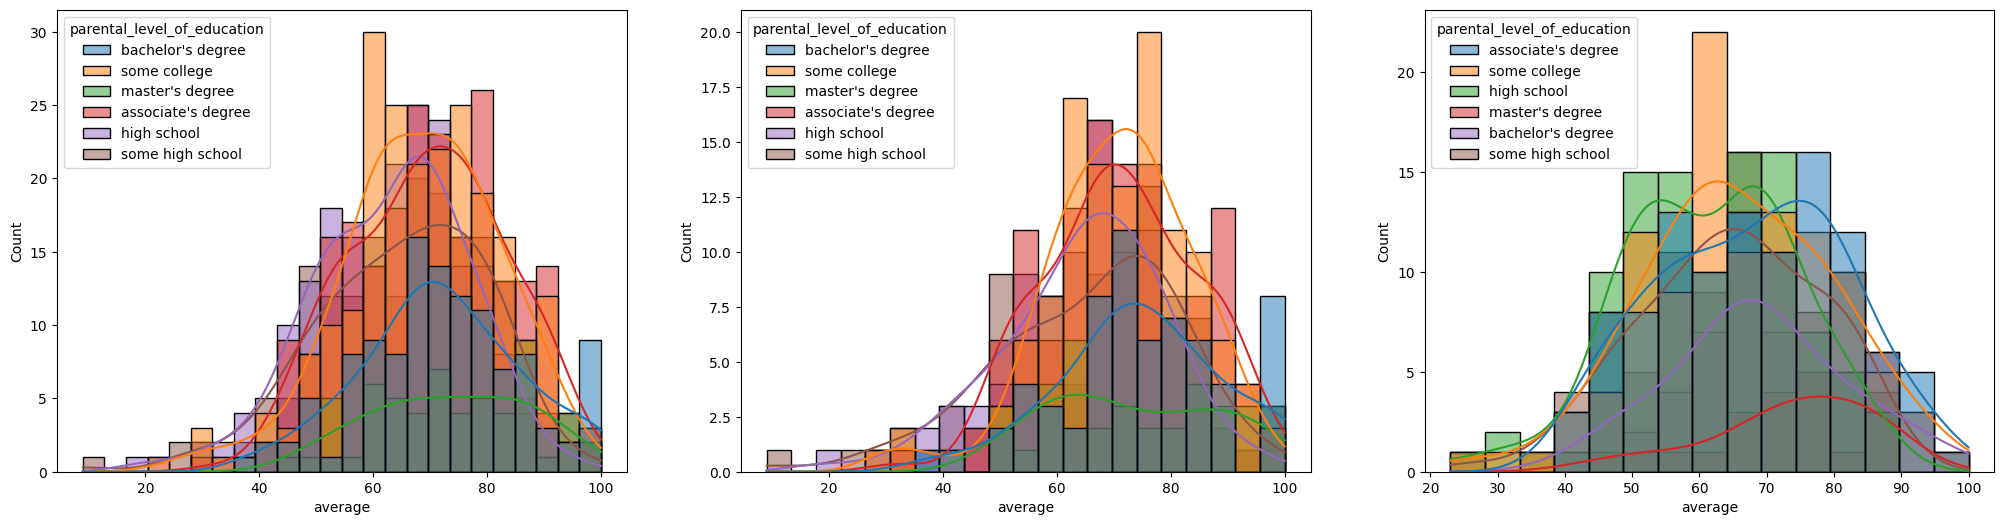

In [61]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

# Insighta
- In general, parent's education do not help studet perform well in exam.
- 2nd plot shows that parent's whose education is of assocoiate's degree or master's degree, their male child tend to perform well in exam
- 3rd plot shows that there is no effect of parent's education on female students. 

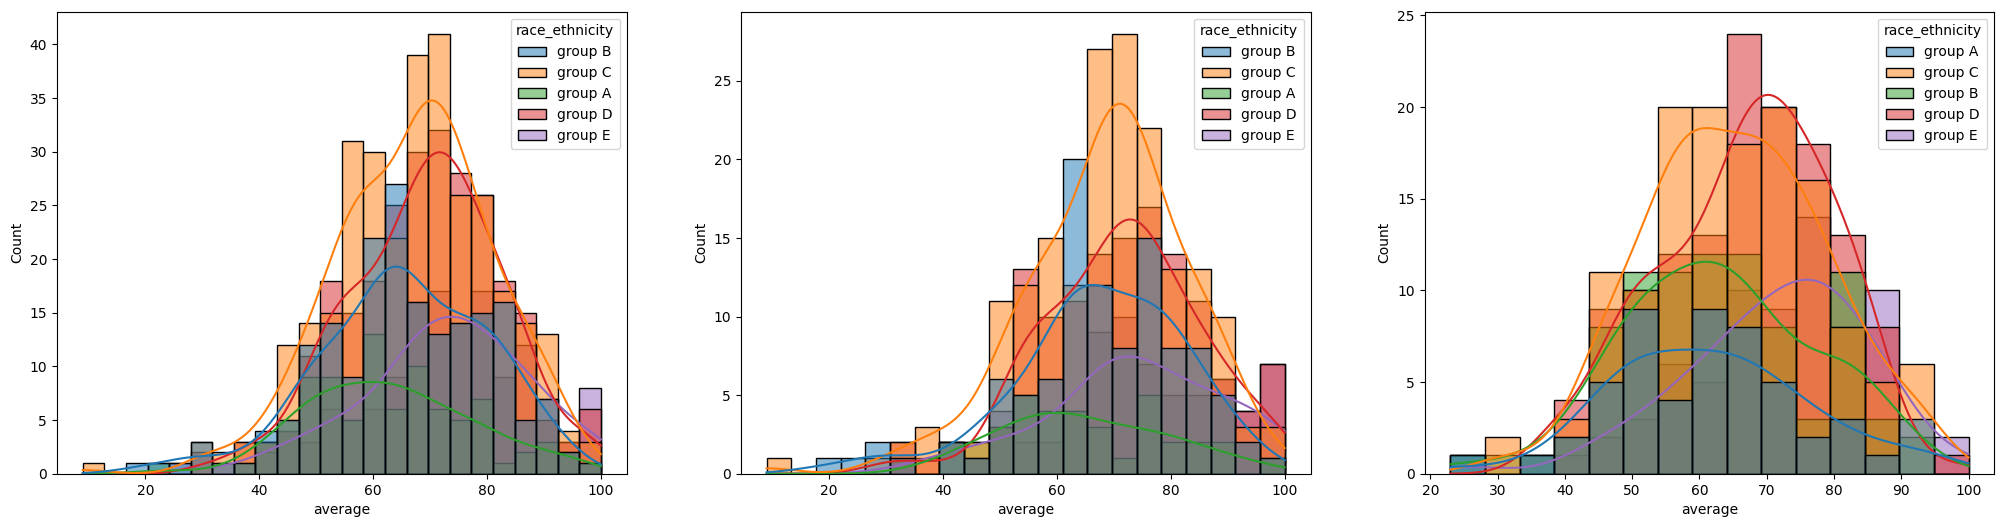

In [66]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

# 4.2 maximum score of students in all three subjects


<Axes: title={'center': 'WRITING SCORE'}, ylabel='writing_score'>

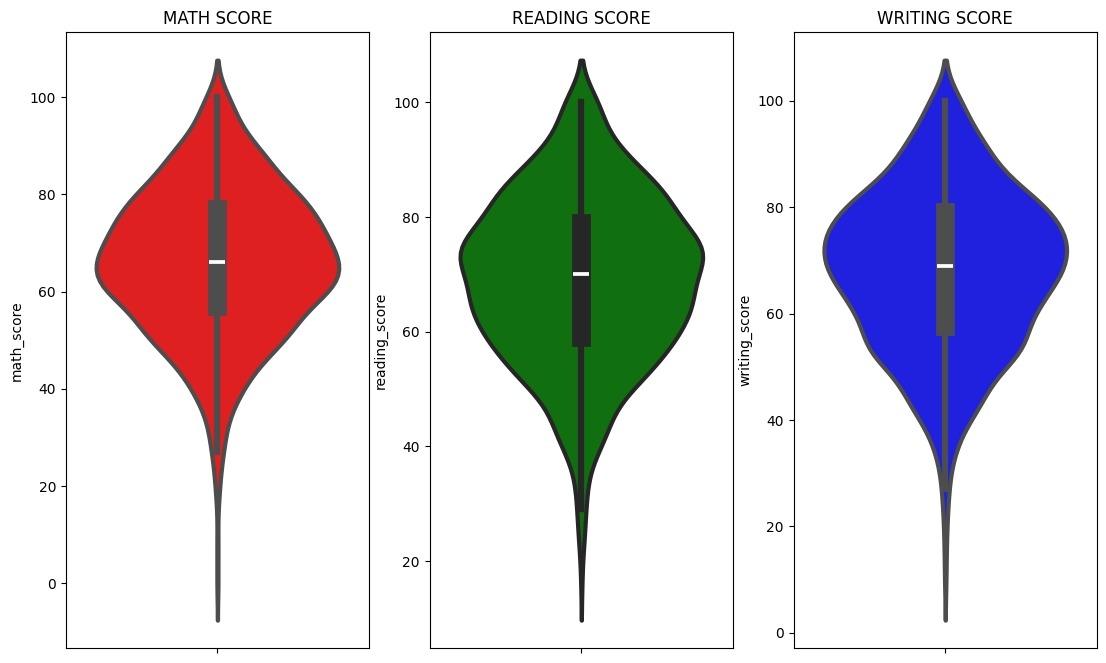

In [72]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)




# Insights
- from the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# 4.3 Multivariate analysis using pyplot


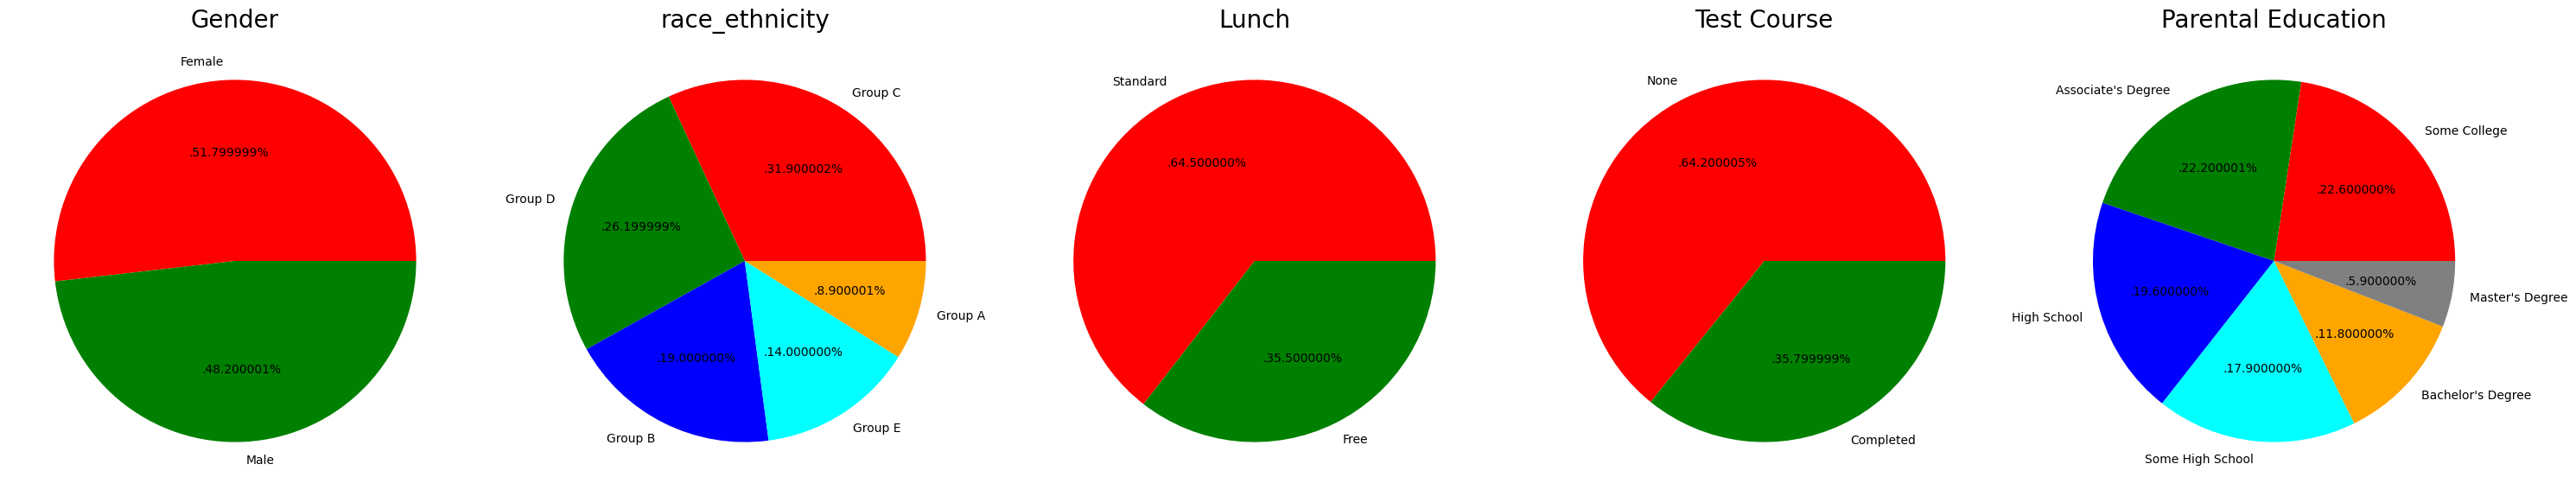

In [101]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('Gender', fontsize= 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color= ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color= ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()


# Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# 4.4 Feature wise visualization
# 4.4.1 GENDER COLUMN

- How is distribution of Gender?
- is gender has any impact on student's performance?

# UNIVARIATE ANALYSIS ( How is distribution of Gender?)


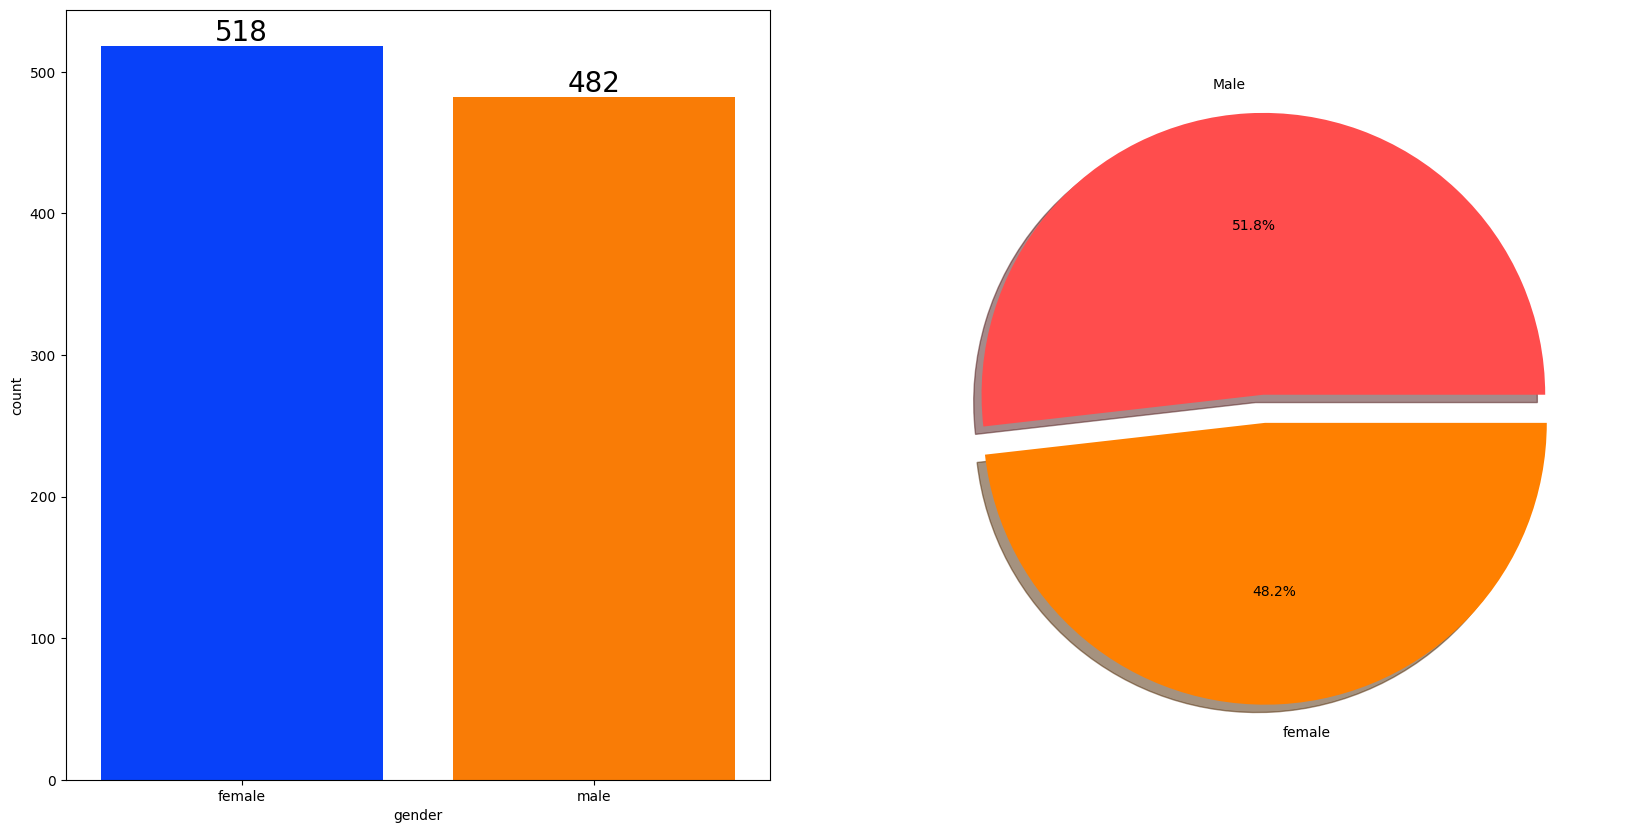

In [107]:
f,ax = plt.subplots(1,2, figsize =(20, 10))
sns.countplot(x=df['gender'], data= df, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'female'], explode = [0, 0.1],autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()

# Insights
- Gender has balanced data with female students of 580 (48%) and male students of 482 (52%)

# BIVARIATE ANALYSIS ( is gender had any impact on student's performance?)

In [131]:
gender_group= df.select_dtypes(include=['number']).groupby('gender').mean()
gender_group


KeyError: 'gender'

In [128]:
plt.figure(figsize=(10, 8))

x = ['Total Average', 'Math Average']
female_scores = [gender_group['average'][0], gender_group['math score'] [0]]
male_scores = [gender_group['average'][1], gender_group['math score'] [1]]
x_axis = np.arrange(len(x))

plt.bar(x_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(x_axis, x)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


NameError: name 'gender_group' is not defined

<Figure size 1000x800 with 0 Axes>

In [120]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

# Insights
- on an average females have a better overall score than men.
- whereas males have socred higher in maths.

# 4.4.2 RACE/ETHNICITY COLUMN
- How is Group wise distribution?
- is Race/Ethnicity has any impact on student's performance?

# UNICARIATE ANALYSIS (how is Group wise distribution ?)

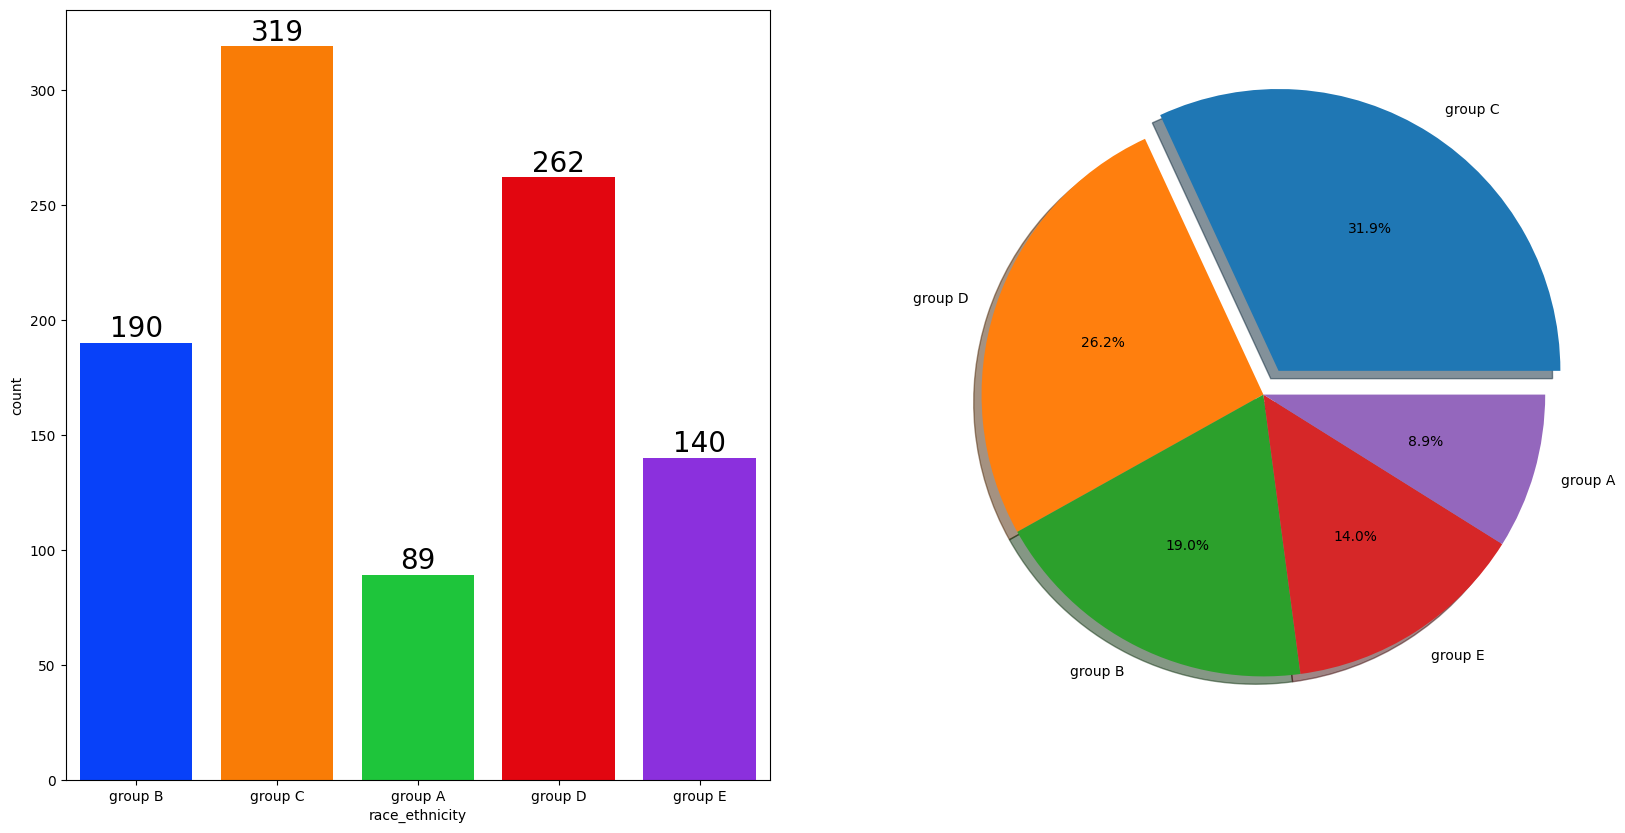

In [132]:
f,ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x =df ['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()